<a href="https://colab.research.google.com/github/kundajelab/locusselect/blob/master/examples/regression%20on%20200%20bp%20genome%20bins.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#load dragonn tutorial utilities 
%reload_ext autoreload
%autoreload 2
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
from numpy.random import seed
seed(1234)

In [2]:
#!pip install locusselect 

## Classification K562 DNAse model (trained genomewide)

In [3]:
## generate embeddings at the -2 layer 
import locusselect 
from locusselect.embeddings import * 
from locusselect.interpret import * 
from locusselect.utils import * 
from locusselect.gapped_kmers import * 
import numpy as np


Using TensorFlow backend.


In [4]:
splits=list(range(10))
coord_prefix="/mnt/lab_data2/annashch/locusselect_examples/embedding_collapse_to_pc/all_peaks/"
model_prefix="/srv/scratch/annashch/deeplearning/encode4crispr/k562_dnase/experiments/gc_content/"
for split in splits: 
    #first, we get embeddings from the model fully connected layer 
    fc_embedding_args={"input_bed_file":coord_prefix+str(split)+".optimal_peak.narrowPeak",
                "model_hdf5":model_prefix+"DNASE.K562.classificationlabels."+str(split)+".withgc",
                "ref_fasta":"/users/annashch/male.hg19.fa",
                "center_on_summit":True,
                "center_on_bed_interval":False,
                "flank":500,
                "embedding_layer_name":"dense_2",
                "embedding_input_name":"input_1",
                "expand_dims":True,
                "threads":20,
                "output_npz_file":str(split)+".summits_FC_layer_NN_embeddings.classification.gc.npz"}
    fc_regions, fc_embeddings = compute_embeddings(fc_embedding_args)

W1026 18:46:12.096703 140687768819456 deprecation_wrapper.py:119] From /users/annashch/miniconda3/lib/python3.7/site-packages/keras/backend/tensorflow_backend.py:517: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W1026 18:46:12.123976 140687768819456 deprecation_wrapper.py:119] From /users/annashch/miniconda3/lib/python3.7/site-packages/keras/backend/tensorflow_backend.py:4138: The name tf.random_uniform is deprecated. Please use tf.random.uniform instead.

W1026 18:46:12.147644 140687768819456 deprecation_wrapper.py:119] From /users/annashch/miniconda3/lib/python3.7/site-packages/keras/backend/tensorflow_backend.py:245: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.

W1026 18:46:12.148444 140687768819456 deprecation_wrapper.py:119] From /users/annashch/miniconda3/lib/python3.7/site-packages/keras/backend/tensorflow_backend.py:174: The name tf.get_default_session is deprecated. Please use tf.compat.

got model architecture
loaded model weights
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            (None, 1, 1000, 4)   0                                            
__________________________________________________________________________________________________
conv2d_1 (Conv2D)               (None, 1, 1000, 300) 23100       input_1[0][0]                    
__________________________________________________________________________________________________
batch_normalization_1 (BatchNor (None, 1, 1000, 300) 1200        conv2d_1[0][0]                   
__________________________________________________________________________________________________
activation_1 (Activation)       (None, 1, 1000, 300) 0           batch_normalization_1[0][0]      
_________________________________________________________________

1/1 [==============================] - 5s 5s/step
created data generator from 1000
1/1 [==============================] - 6s 6s/step
created data generator from 2000
1/1 [==============================] - 5s 5s/step
created data generator from 3000
1/1 [==============================] - 5s 5s/step
created data generator from 4000
1/1 [==============================] - 5s 5s/step
created data generator from 5000
1/1 [==============================] - 5s 5s/step
created data generator from 6000
1/1 [==============================] - 5s 5s/step
created data generator from 7000
1/1 [==============================] - 5s 5s/step
created data generator from 8000
1/1 [==============================] - 5s 5s/step
created data generator from 9000
1/1 [==============================] - 5s 5s/step
created data generator from 10000
1/1 [==============================] - 5s 5s/step
created data generator from 11000
1/1 [==============================] - 5s 5s/step
created data generator from 12000
1

1/1 [==============================] - 5s 5s/step
created data generator from 1000
1/1 [==============================] - 6s 6s/step
created data generator from 2000
1/1 [==============================] - 6s 6s/step
created data generator from 3000
1/1 [==============================] - 6s 6s/step
created data generator from 4000
1/1 [==============================] - 5s 5s/step
created data generator from 5000
1/1 [==============================] - 6s 6s/step
created data generator from 6000
1/1 [==============================] - 6s 6s/step
created data generator from 7000
1/1 [==============================] - 5s 5s/step
created data generator from 8000
1/1 [==============================] - 7s 7s/step
created data generator from 9000
1/1 [==============================] - 5s 5s/step
created data generator from 10000
1/1 [==============================] - 7s 7s/step
created data generator from 11000
1/1 [==============================] - 5s 5s/step
created data generator from 12000
1

1/1 [==============================] - 5s 5s/step
created data generator from 1000
1/1 [==============================] - 5s 5s/step
created data generator from 2000
1/1 [==============================] - 6s 6s/step
created data generator from 3000
1/1 [==============================] - 6s 6s/step
created data generator from 4000
1/1 [==============================] - 6s 6s/step
created data generator from 5000
1/1 [==============================] - 6s 6s/step
created data generator from 6000
1/1 [==============================] - 5s 5s/step
created data generator from 7000
1/1 [==============================] - 6s 6s/step
created data generator from 8000
1/1 [==============================] - 6s 6s/step
created data generator from 9000
1/1 [==============================] - 6s 6s/step
created data generator from 10000
1/1 [==============================] - 7s 7s/step
created data generator from 11000
1/1 [==============================] - 5s 5s/step
created data generator from 12000
1

1/1 [==============================] - 5s 5s/step
created data generator from 1000
1/1 [==============================] - 5s 5s/step
created data generator from 2000
1/1 [==============================] - 5s 5s/step
created data generator from 3000
1/1 [==============================] - 6s 6s/step
created data generator from 4000
1/1 [==============================] - 5s 5s/step
created data generator from 5000
1/1 [==============================] - 6s 6s/step
created data generator from 6000
1/1 [==============================] - 5s 5s/step
created data generator from 7000
1/1 [==============================] - 6s 6s/step
created data generator from 8000
1/1 [==============================] - 5s 5s/step
created data generator from 9000
1/1 [==============================] - 6s 6s/step
created data generator from 10000
1/1 [==============================] - 6s 6s/step
created data generator from 11000
1/1 [==============================] - 5s 5s/step
created data generator from 12000
1

1/1 [==============================] - 5s 5s/step
created data generator from 1000
1/1 [==============================] - 4s 4s/step
created data generator from 2000
1/1 [==============================] - 5s 5s/step
created data generator from 3000
1/1 [==============================] - 10s 10s/step
created data generator from 4000
1/1 [==============================] - 4s 4s/step
created data generator from 5000
1/1 [==============================] - 5s 5s/step
created data generator from 6000
1/1 [==============================] - 6s 6s/step
created data generator from 7000
1/1 [==============================] - 5s 5s/step
created data generator from 8000
1/1 [==============================] - 5s 5s/step
created data generator from 9000
1/1 [==============================] - 5s 5s/step
created data generator from 10000
1/1 [==============================] - 5s 5s/step
created data generator from 11000
1/1 [==============================] - 5s 5s/step
created data generator from 12000

1/1 [==============================] - 5s 5s/step
created data generator from 1000
1/1 [==============================] - 5s 5s/step
created data generator from 2000
1/1 [==============================] - 5s 5s/step
created data generator from 3000
1/1 [==============================] - 8s 8s/step
created data generator from 4000
1/1 [==============================] - 5s 5s/step
created data generator from 5000
1/1 [==============================] - 5s 5s/step
created data generator from 6000
1/1 [==============================] - 5s 5s/step
created data generator from 7000
1/1 [==============================] - 5s 5s/step
created data generator from 8000
1/1 [==============================] - 5s 5s/step
created data generator from 9000
1/1 [==============================] - 5s 5s/step
created data generator from 10000
1/1 [==============================] - 5s 5s/step
created data generator from 11000
1/1 [==============================] - 5s 5s/step
created data generator from 12000
1

1/1 [==============================] - 5s 5s/step
created data generator from 1000
1/1 [==============================] - 5s 5s/step
created data generator from 2000
1/1 [==============================] - 5s 5s/step
created data generator from 3000
1/1 [==============================] - 5s 5s/step
created data generator from 4000
1/1 [==============================] - 5s 5s/step
created data generator from 5000
1/1 [==============================] - 5s 5s/step
created data generator from 6000
1/1 [==============================] - 4s 4s/step
created data generator from 7000
1/1 [==============================] - 5s 5s/step
created data generator from 8000
1/1 [==============================] - 5s 5s/step
created data generator from 9000
1/1 [==============================] - 5s 5s/step
created data generator from 10000
1/1 [==============================] - 5s 5s/step
created data generator from 11000
1/1 [==============================] - 5s 5s/step
created data generator from 12000
1

1/1 [==============================] - 5s 5s/step
created data generator from 1000
1/1 [==============================] - 5s 5s/step
created data generator from 2000
1/1 [==============================] - 5s 5s/step
created data generator from 3000
1/1 [==============================] - 5s 5s/step
created data generator from 4000
1/1 [==============================] - 5s 5s/step
created data generator from 5000
1/1 [==============================] - 6s 6s/step
created data generator from 6000
1/1 [==============================] - 5s 5s/step
created data generator from 7000
1/1 [==============================] - 5s 5s/step
created data generator from 8000
1/1 [==============================] - 5s 5s/step
created data generator from 9000
1/1 [==============================] - 5s 5s/step
created data generator from 10000
1/1 [==============================] - 5s 5s/step
created data generator from 11000
1/1 [==============================] - 5s 5s/step
created data generator from 12000
1

1/1 [==============================] - 6s 6s/step
created data generator from 1000
1/1 [==============================] - 5s 5s/step
created data generator from 2000
1/1 [==============================] - 6s 6s/step
created data generator from 3000
1/1 [==============================] - 6s 6s/step
created data generator from 4000
1/1 [==============================] - 5s 5s/step
created data generator from 5000
1/1 [==============================] - 5s 5s/step
created data generator from 6000
1/1 [==============================] - 6s 6s/step
created data generator from 7000
1/1 [==============================] - 8s 8s/step
created data generator from 8000
1/1 [==============================] - 5s 5s/step
created data generator from 9000
1/1 [==============================] - 5s 5s/step
created data generator from 10000
1/1 [==============================] - 5s 5s/step
created data generator from 11000
1/1 [==============================] - 5s 5s/step
created data generator from 12000
1

1/1 [==============================] - 7s 7s/step
created data generator from 1000
1/1 [==============================] - 6s 6s/step
created data generator from 2000
1/1 [==============================] - 6s 6s/step
created data generator from 3000
1/1 [==============================] - 6s 6s/step
created data generator from 4000
1/1 [==============================] - 6s 6s/step
created data generator from 5000
1/1 [==============================] - 6s 6s/step
created data generator from 6000
1/1 [==============================] - 6s 6s/step
created data generator from 7000
1/1 [==============================] - 6s 6s/step
created data generator from 8000
1/1 [==============================] - 6s 6s/step
created data generator from 9000
1/1 [==============================] - 6s 6s/step
created data generator from 10000
1/1 [==============================] - 6s 6s/step
created data generator from 11000
1/1 [==============================] - 6s 6s/step
created data generator from 12000
1

In [6]:
#combine the loci embeddings into a single data frame 
all_embeddings=None
all_bed_entries=None
locus_to_pos={}
locus_prefix="/mnt/lab_data2/annashch/locusselect_examples/gc_corrected/classification.1kb.FClayer.embeddings.gc.corrected/"
locus_suffix="_FC_layer_NN_embeddings.classification.gc.npz"
loci=["BCL11A","HBA2","HBE1","LMO2","MYC","RBM38"]
last_index=0
for locus in loci: 
    cur_embedding_data=np.load(locus_prefix+locus+locus_suffix,allow_pickle=True)
    cur_bed_entries=cur_embedding_data['bed_entries']
    cur_embeddings=cur_embedding_data['embeddings']
    if all_embeddings is None: 
        all_embeddings=cur_embeddings 
        all_bed_entries=cur_bed_entries
    else: 
        all_embeddings=np.concatenate((all_embeddings,cur_embeddings),axis=0)
        all_bed_entries=np.concatenate((all_bed_entries,cur_bed_entries),axis=0)
    start_pos=last_index 
    end_pos=last_index+cur_embeddings.shape[0]
    last_index=end_pos 
    locus_to_pos[locus]=[start_pos,end_pos]
    

In [7]:
#augment with all peak embeddings 
splits=list(range(10))

for split in splits: 
    cur_embeddings_data=np.load(str(split)+".summits_FC_layer_NN_embeddings.classification.gc.npz",allow_pickle=True)
    cur_bed_entries=cur_embedding_data['bed_entries']
    cur_embeddings=cur_embedding_data['embeddings']
    all_embeddings=np.concatenate((all_embeddings,cur_embeddings),axis=0)
    all_bed_entries=np.concatenate((all_bed_entries,cur_bed_entries),axis=0)

In [8]:
# run PCA on the embeddings 
# Dimension reduction and clustering libraries
import umap
import hdbscan
import sklearn.cluster as cluster
from sklearn.metrics import adjusted_rand_score, adjusted_mutual_info_score

/users/annashch/miniconda3/lib/python3.7/site-packages/sklearn/externals/six.py:31: DeprecationWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", DeprecationWarning)
/users/annashch/miniconda3/lib/python3.7/site-packages/sklearn/externals/joblib/__init__.py:15: DeprecationWarning: sklearn.externals.joblib is deprecated in 0.21 and will be removed in 0.23. Please import this functionality directly from joblib, which can be installed with: pip install joblib. If this warning is raised when loading pickled models, you may need to re-serialize those models with scikit-learn 0.21+.
  warnings.warn(msg, category=DeprecationWarning)


In [9]:
from sklearn.decomposition import PCA 
  
pca = PCA(n_components = 1000) 
  
pca_res = pca.fit_transform(all_embeddings)   
explained_variance = pca.explained_variance_ratio_ # verify that the PCA embeddings have same UMAP projection as original embeddings. 

In [10]:
explained_variance[0:10]
np.cumsum(explained_variance)

array([0.34739929, 0.47324789, 0.57785912, 0.63945235, 0.67825442,
       0.7086871 , 0.73206524, 0.75416983, 0.77233755, 0.78845413,
       0.80332688, 0.81750635, 0.83001129, 0.84125164, 0.85178307,
       0.86155258, 0.87020829, 0.87810888, 0.88580509, 0.89322308,
       0.90005335, 0.90614226, 0.91187282, 0.91741403, 0.92240037,
       0.92699656, 0.93145647, 0.93535262, 0.93891781, 0.94229728,
       0.94528713, 0.94824883, 0.9510725 , 0.95366608, 0.95602854,
       0.95817759, 0.96009822, 0.96196904, 0.96370503, 0.96542909,
       0.96689304, 0.96832535, 0.96972875, 0.97105201, 0.97224083,
       0.973369  , 0.97442403, 0.97539828, 0.97634472, 0.97723035,
       0.97798811, 0.97871368, 0.97943014, 0.98010413, 0.98071567,
       0.9813075 , 0.98185606, 0.98238645, 0.98290126, 0.98338539,
       0.98382857, 0.98425423, 0.98465904, 0.98504033, 0.985417  ,
       0.985776  , 0.98610451, 0.98643189, 0.98674373, 0.9870437 ,
       0.98733472, 0.98759292, 0.98784712, 0.98809096, 0.98832

## use 85 PC's 

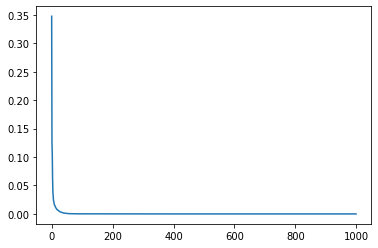

In [11]:
from matplotlib import pyplot as plt
plt.plot(explained_variance)

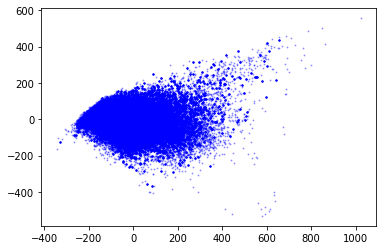

In [12]:
plt.plot(pca_res[:,0],pca_res[:,1],'bo',markersize=1,alpha=0.3)


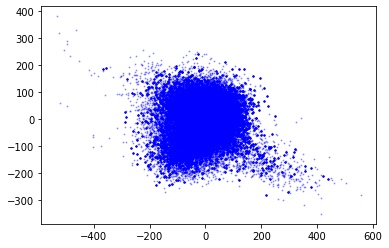

In [13]:
plt.plot(pca_res[:,1],pca_res[:,2],'bo',markersize=1,alpha=0.3)


In [14]:
from plotnine import * 

(8001, 86)


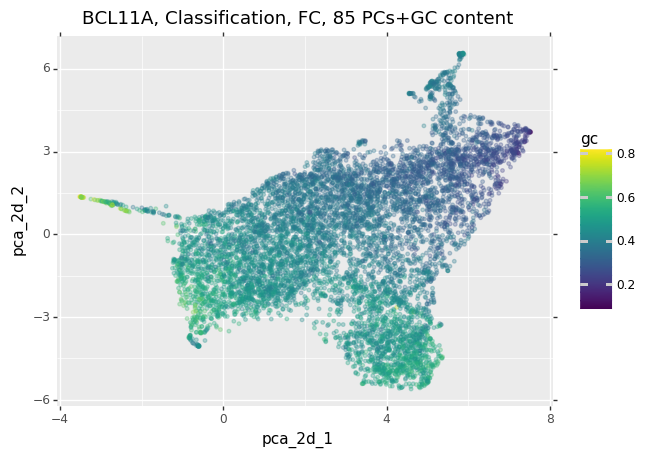

<ggplot: (8763211684195)>


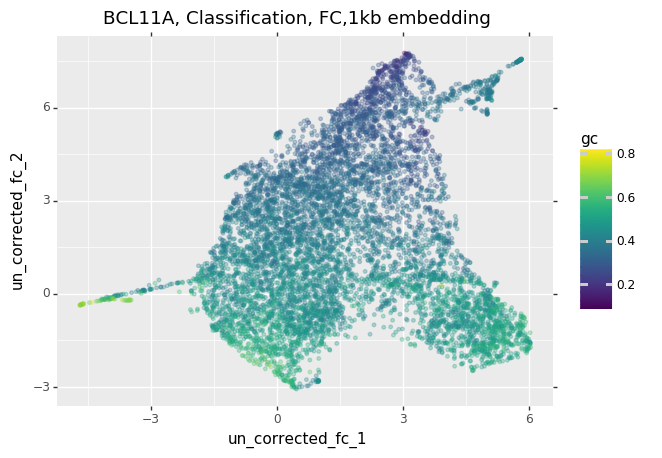

<ggplot: (8763210843270)>
(4652, 86)


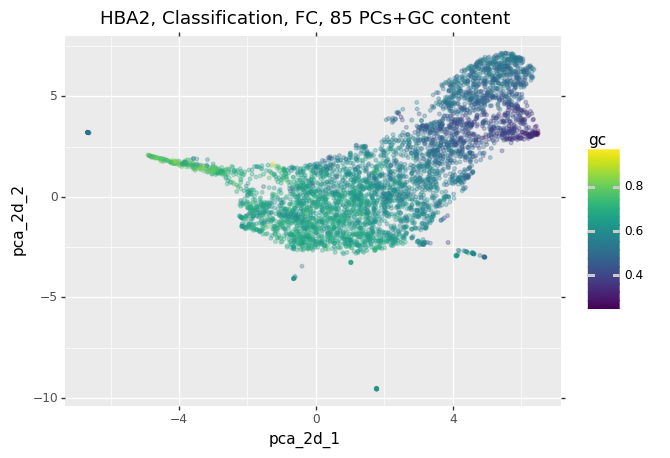

<ggplot: (-9223363273644149006)>


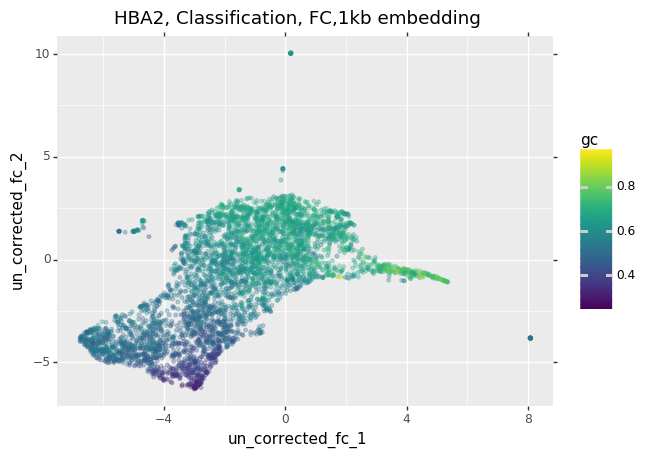

<ggplot: (-9223363273643932640)>
(8001, 86)


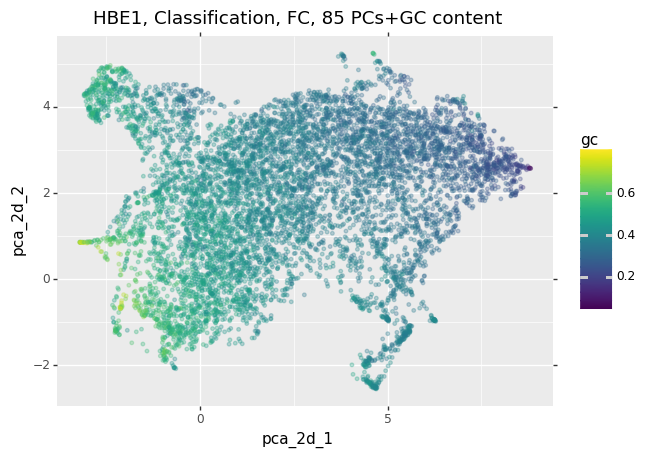

<ggplot: (-9223363273643906770)>


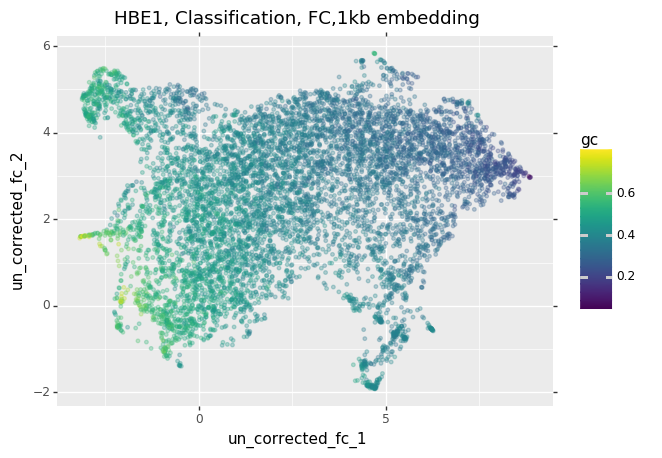

<ggplot: (8763211134605)>
(8001, 86)


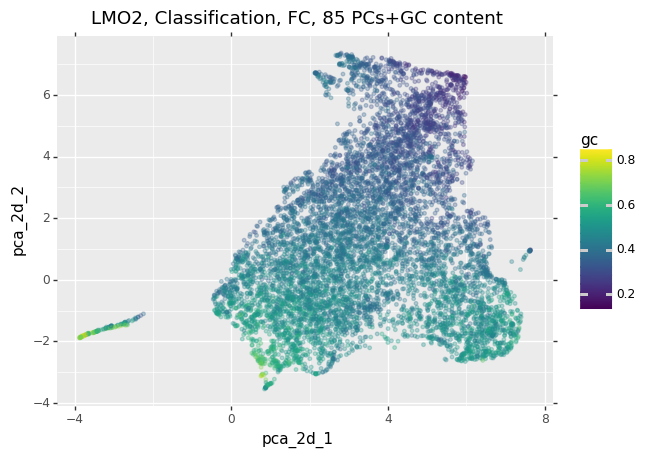

<ggplot: (-9223363273644131205)>


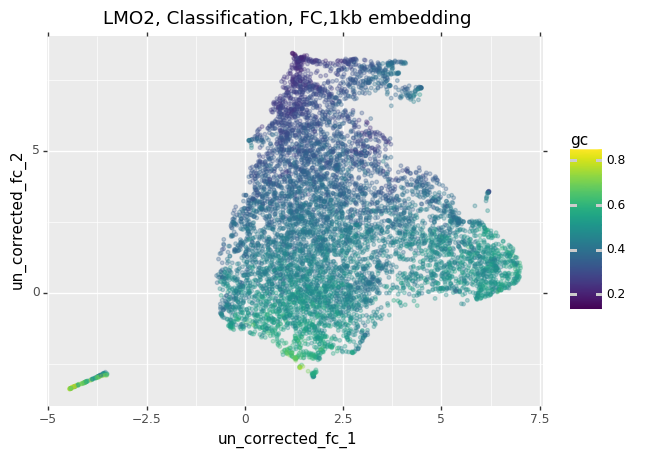

<ggplot: (8763211431744)>
(8001, 86)


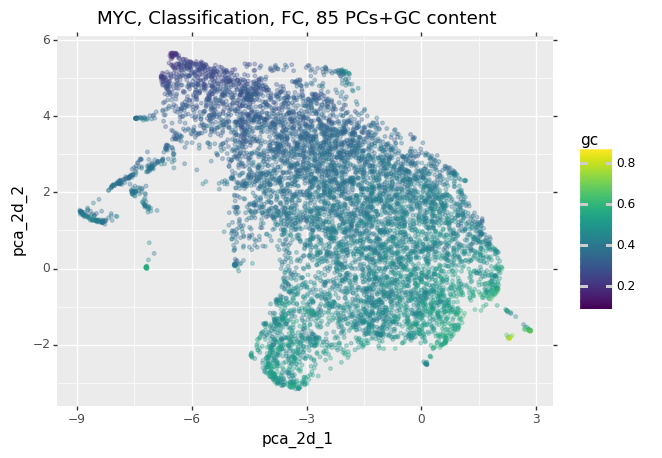

<ggplot: (8763211160917)>


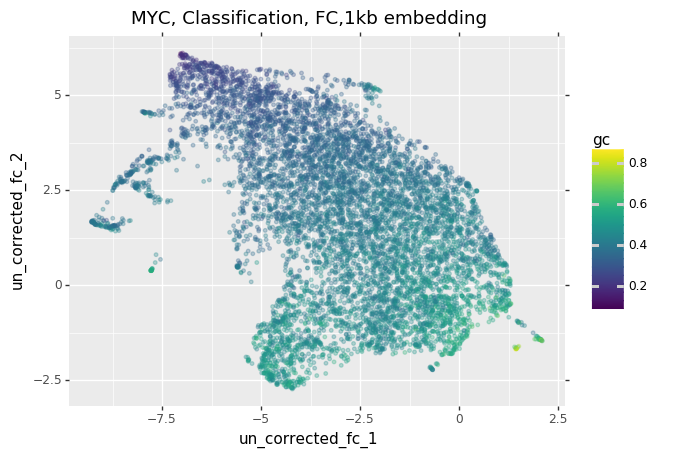

<ggplot: (-9223363273643343914)>
(8001, 86)


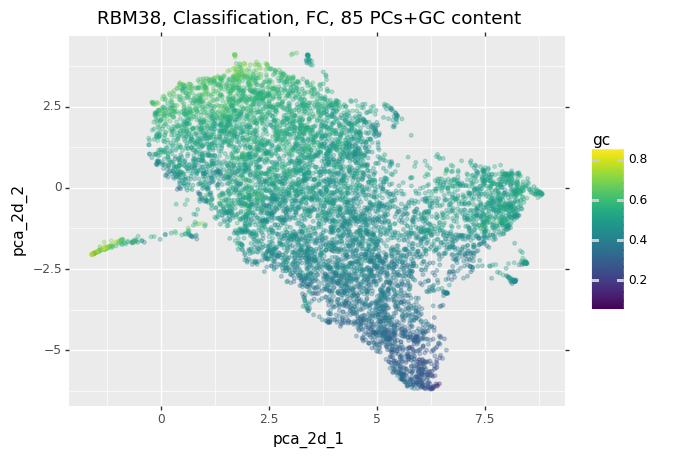

<ggplot: (-9223363273643533417)>


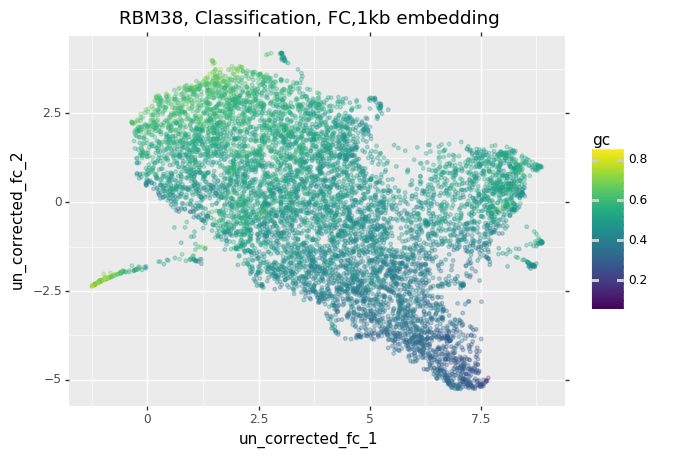

<ggplot: (8763211280546)>


In [15]:
for locus in loci: 
    gc_content=open("../compute_gc/gc."+locus+".bed",'r').read().strip().split('\n')
    gc_vals=np.expand_dims(np.asarray([float(i.split('\t')[-1]) for i in gc_content]),axis=1)
    #add gc column to embedding 
    pca_with_gc=np.concatenate((pca_res[locus_to_pos[locus][0]:locus_to_pos[locus][1],0:85],gc_vals),axis=1)
    coords=all_bed_entries[locus_to_pos[locus][0]:locus_to_pos[locus][1]]
    print(pca_with_gc.shape)
    #save 
    np.savez_compressed(locus+"_FC_layer_NN_embeddings.classification.gc.top85pcs.npz",bed_entries=coords,embeddings=pca_with_gc)
    pca_2d = umap.UMAP(random_state=42).fit_transform(pca_with_gc)
    df_pca=pd.DataFrame.from_dict({'pca_2d_1':pca_2d[:,0],
                              'pca_2d_2':pca_2d[:,1],
                              'gc':gc_vals.squeeze()})
    print((ggplot(df_pca,aes(x='pca_2d_1', y='pca_2d_2',color='gc'))+
       geom_point(size=1,alpha=0.3)+
       ggtitle(locus+", Classification, FC, 85 PCs+GC content")))
    un_corrected_fc_embeddings_2d = umap.UMAP(random_state=42).fit_transform(all_embeddings[locus_to_pos[locus][0]:locus_to_pos[locus][1]])
    df_fc=pd.DataFrame.from_dict({'un_corrected_fc_1':un_corrected_fc_embeddings_2d[:,0],
                              'un_corrected_fc_2':un_corrected_fc_embeddings_2d[:,1],
                              'gc':gc_vals.squeeze()})
    print((ggplot(df_fc,aes(x='un_corrected_fc_1', y='un_corrected_fc_2',color='gc'))+
       geom_point(size=1,alpha=0.3)+
       ggtitle(locus+", Classification, FC,1kb embedding")))
